In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from tensorflow import keras
import seaborn as sns
from sklearn.utils import compute_class_weight

In [2]:
train = pd.read_csv("../dataset/goodreads_train.csv")


In [3]:
X = train["review_text"]
y = keras.utils.to_categorical(train['rating'], num_classes=6).astype(int)

In [4]:
classWeight = compute_class_weight(class_weight='balanced',
                                   classes =np.unique(train['rating']),
                                   y=train['rating'])
classWeight = dict(enumerate(classWeight))

In [5]:
classWeight

{0: 4.8405834516587065,
 1: 5.223204958562574,
 2: 2.0653475980007436,
 3: 0.7937683889676778,
 4: 0.4781821427660605,
 5: 0.5660227843038108}

In [6]:
vectorize_layer = keras.layers.TextVectorization(
    max_tokens= 494871,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    output_mode='int',
    output_sequence_length=1400,
    vocabulary=np.load('../voc2.npy')
)

In [7]:
model = keras.Sequential([
    vectorize_layer,
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(8, activation = 'relu'),
    keras.layers.Dense(6, activation = 'softmax')
])

In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/3
144/144 [==============================] - 77s 501ms/step - loss: 1360.7472 - accuracy: 0.1375 - val_loss: 19.7104 - val_accuracy: 0.0491
Epoch 2/3
144/144 [==============================] - 82s 568ms/step - loss: 14.0437 - accuracy: 0.0768 - val_loss: 4.4953 - val_accuracy: 0.0332
Epoch 3/3
144/144 [==============================] - 86s 599ms/step - loss: 3.8518 - accuracy: 0.0347 - val_loss: 2.9212 - val_accuracy: 0.0312


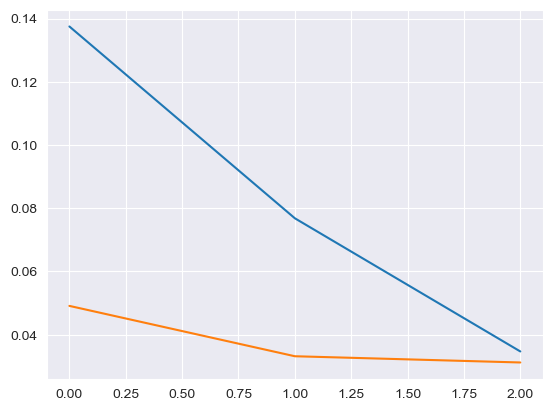

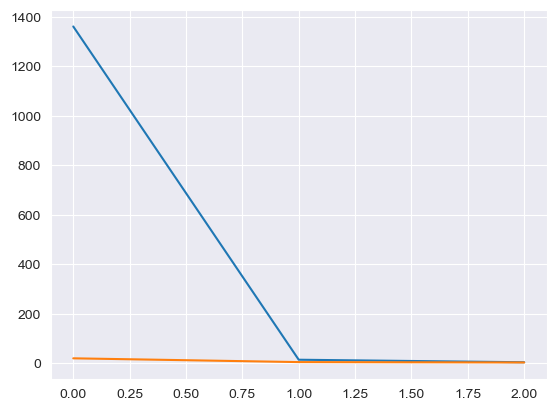

In [9]:
history = model.fit(X, y, epochs = 3, batch_size = 5000 , validation_split = 0.2, class_weight= classWeight)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()